# Kaggle Project - Mobile Price Classification

#### URL : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
#### 2022121097 / 이택구

**Task:**

#### 핸드폰 가격을 알아보는 모델

##### 데이터셋 : 총 2,000 개

##### 휴대폰 가격은 4가지 범위로 되어 있으며
0: 저렴한 가격<br>
1: 중간 가격<br>
2: 높은 가격<br>
3: 매우 높은 가격<br>


##### 컬럼은 총 21 가지로 되어 있고 CPU clock 속도, 4G, 메모리, 화면 폭과 높이, 와이파이 등의 정보를 가지고 있다.

##### 데이터 파일  (train.csv, test.csv)
1) train.csv 파일은 모델학습 데이터셋으로 사용<br>
2) test.csv 파일은 정답 정보가 없어서 진행에서 제외<br>

#### - 진행 절차
1) CNNModel 클래스를 작성<br>
2) CNNModel 모델 성능 확인 (20 ~ 30%) - 저조한 성능확인<br>
3) LinearRegression 성능확인 (30 ~ 50%) - 중간 성능 확인<br>
4) DecisionTreeClassifier, SVC 모델 확인 (90 ~ 100%) - 우수한 성능 확인<br>

#### - 결론
성능 확인 결과 : DecisionTreeClassifier, SVC 이 96 ~ 100% 의 성능을 확인하였으며 DecisionTreeClassifier 와 SVC 모델이 우수한 것으로 확인되었다.

**Datasets:**

* Training dataset : 총 갯수의 85% 로 지정<br>
* Validation dataset : 총 갯수의 15%로 지정<br>
* Test dataset : 랜덤으로 100를 추출하여 테스트<br>
   ( 정답이 있는 실제 데이터 내에서 램덤으로 추출하여 사용 )<br>

**Features(x):**

- 컬럼 index 0 ~ 19 : feature(x)<br><br>

- Data columns : 20 columns<br>

<pre>
| #  |  Column         |  Dtype   |
|----| --------------  |  ------- |
| 0  |  battery_power  |  int64   |
| 1  |  blue           |  int64   |
| 2  |  clock_speed    |  float64 |
| 3  |  dual_sim       |  int64   |
| 4  |  fc             |  int64   |
| 5  |  four_g         |  int64   |
| 6  |  int_memory     |  int64   |
| 7  |  m_dep          |  float64 |
| 8  |  mobile_wt      |  int64   |
| 9  |  n_cores        |  int64   |
| 10 |  pc             |  int64   |
| 11 |  px_height      |  int64   |
| 12 |  px_width       |  int64   |
| 13 |  ram            |  int64   |
| 14 |  sc_h           |  int64   |
| 15 |  sc_w           |  int64   |
| 16 |  talk_time      |  int64   |
| 17 |  three_g        |  int64   |
| 18 |  touch_screen   |  int64   |
| 19 |  wifi           |  int64   |
</pre>



**Target(y):**

- 컬럼 index 20 : target(y)<br><br>

- Data columns : 1 column<br>

<pre>
| #  |  Column         |  Dtype   |
|----| --------------  |  ------- |
| 20 |  price_range    |  int64   |
</pre>

- Data Range : 0, 1, 2, 3


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Data preprocessing (데이터 수집 및 분석)

In [2]:
mob_data = pd.read_csv('./data/train.csv')

In [3]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
mob_data.shape

(2000, 21)

In [6]:
# 가격 범위별 건수 확인

mob_data["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

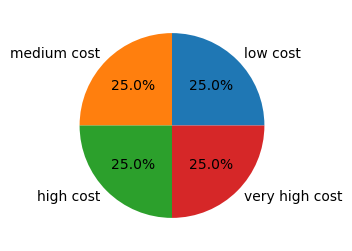

In [7]:
# 가격 범위별 비율 확인

plt.figure(figsize=(12,3))

plt.subplot(1, 2, 2)
plt.pie(mob_data["price_range"].value_counts(), labels = ["low cost", "medium cost","high cost","very high cost"], autopct = "%2.1f%%")

plt.show()

### Split Train Data (Train 데이터 분할)

In [8]:
# index 0 ~ 19 : feature(x)
# index 20 : target(y)

mdata_x    = mob_data.values[:, :20]
mdata_y    = mob_data.values[:, 20:]
data_len   = len(mdata_x)

# Train 데이터 분리 (85%)
train_len  = int(data_len * 0.85)
train_idxs = np.random.choice(data_len, train_len, replace=False)
train_x    = mdata_x[train_idxs]
train_y    = mdata_y[train_idxs]

# Validation 데이터 분리 (15%)
val_idxs   = [idx for idx in range(data_len) if idx not in train_idxs]
val_x      = mdata_x[val_idxs]
val_y      = mdata_y[val_idxs]

### Model Construction

In [9]:
#
# CNN 모델 클래스
#
class CnnModel(nn.Module):
    # 모델 초기화
    def __init__(self):
        super(CnnModel, self).__init__()
        
        self.conv_layer = nn.Sequential(
            # 휴대폰 데이터가 
            nn.Conv1d(1, 16, 3),
            nn.ReLU(),

            nn.Conv1d(16, 32, 3),
            nn.ReLU(),

            nn.Conv1d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool1d(2, 2)
        )
        
        # fully con = 64 * 7 = conv_layer output
        self.fc_layer = nn.Sequential(
            nn.Linear(64*7, 1000),
            nn.ReLU(),
            nn.Linear(1000, 4)
        )
        
    def forward(self,x):
        out = self.conv_layer(x)
        # print('out.shape: ', out.shape)
        out = out.view(-1,64*7)
        out = self.fc_layer(out)

        return out

In [10]:
# classification 모델 설정

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [11]:
# CNN 모델 선언

model_cnn = CnnModel()

In [12]:
# LR, DT, SVC 모델 선언

model_lr = LogisticRegression(fit_intercept=True,
                              solver='lbfgs',
                              random_state=0) # Loss function is fixed to BCE.

model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best',
                                  max_depth=10,
                                  random_state=0)

model_svc = SVC(C=1.0, kernel='rbf', gamma='scale')

### Train Model & Select Model

In [13]:
# CNN 손실함수 

cnn_loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_cnn.parameters(), lr=0.01)

In [14]:
# LR, DT, SVC 모델 선정
models = [model_lr, model_dt, model_svc]

def accuracy(pre, y):
    return sum(pre==y)/len(y)

### Training Dataset 을 통한 모델 학습

In [15]:
num_epochs = 10

# CNN 모델의 학습
for epoch in range(num_epochs):
    # array to tensor 변환
    np_arr    = np.array(train_x).reshape(train_x.shape[0], 1, train_x.shape[1])
    tensor_x  = torch.Tensor(np_arr)
    np_arr    = np.array(train_y).reshape(-1,)
    tensor_y  = torch.LongTensor(np_arr)

    pre       = model_cnn(tensor_x)
    cost      = cnn_loss(pre, tensor_y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, cost.item()))

Epoch [1/10], Loss: 8.3668
Epoch [2/10], Loss: 3444.2993
Epoch [3/10], Loss: 336.4549
Epoch [4/10], Loss: 4135.6895
Epoch [5/10], Loss: 15810066.0000
Epoch [6/10], Loss: 136616976.0000
Epoch [7/10], Loss: 15347906248704.0000
Epoch [8/10], Loss: 309695856106107568899751936.0000
Epoch [9/10], Loss: 136176539530014597914296320.0000
Epoch [10/10], Loss: 976305899515057563302690828582912.0000


In [16]:
# LR, DT, SVC 모델
# 모델별 모델 학습 진행

for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    
    acc = accuracy(pre, train_y)
    
    print(model, acc)

for model in models:
    pre = model.predict(val_x)
    
    acc = accuracy(pre, val_y)
    
    print(model, acc.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

LogisticRegression(random_state=0) [0.25588235 0.24529412 0.25352941 ... 0.25352941 0.25352941 0.25588235]
DecisionTreeClassifier(max_depth=10, random_state=0) [0.24529412 0.25588235 0.25588235 ... 0.24529412 0.25352941 0.25588235]
SVC() [0.24529412 0.25588235 0.25588235 ... 0.24529412 0.25352941 0.25588235]
LogisticRegression(random_state=0) 0.2505777777777778
DecisionTreeClassifier(max_depth=10, random_state=0) 0.25255555555555553
SVC() 0.2534222222222222


### Performance (Test dataset을 통한 성능 확인)

In [17]:
# 테스트 데이터 생성

test_len   = 100
test_idxs  = np.random.choice(data_len, test_len, replace=False)

In [18]:
# LogisticRegression 모델
# DecisionTreeClassifier 모델
# SVC 모델
# 모델의 성능 확인

test_data  = mdata_x[test_idxs]
test_y     = (mdata_y[test_idxs]).astype(np.int32).reshape(-1,)

best_model = {}
max_cocnt = 0
for idx, model in enumerate(models):
    pre = model.predict(test_data).astype(np.int32)

    tcnt = (pre == test_y).astype(np.int32).sum()
    if tcnt > max_cocnt :
        max_cocnt = tcnt
        best_model = model

    print(model, tcnt / test_len)


LogisticRegression(random_state=0) 0.57
DecisionTreeClassifier(max_depth=10, random_state=0) 0.97
SVC() 0.98


In [19]:
# CNN 모델
# 모델의 성능 확인

test_data    = mdata_x[test_idxs]
test_y       = mdata_y[test_idxs]

cnn_correct  = 0

for i, test_x in enumerate(test_data):
    np_arr    = np.array(test_x).reshape(1, 1, test_x.shape[0])
    tensor_x  = torch.Tensor(np_arr)
    tensor_y  = int(test_y[i])

    outputs   = model_cnn(tensor_x)

    _, predicted = torch.max(outputs.data, 1)
    # print ('predicted: ', predicted.item(), tensor_y)

    cnn_correct += (predicted == tensor_y).sum()

print('Accuracy of CNN Model: %f %%' % (100 * float(cnn_correct) / test_len))

if cnn_correct > max_cocnt :
    max_cocnt = tcnt
    best_model = model_cnn

Accuracy of CNN Model: 27.000000 %


In [20]:
# Best 모델 선정

print('**********************************************************************')
print('*** Best Model: ', best_model)
print('*** 정확도: %f %%' % (100 * float(max_cocnt) / test_len))
print('**********************************************************************')

**********************************************************************
*** Best Model:  SVC()
*** 정확도: 98.000000 %
**********************************************************************
